In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rains = pd.read_csv('../data/weatherAUS.csv')

In [3]:
rains.shape

(145460, 23)

In [4]:
rains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rains['Date'] = pd.to_datetime(rains['Date'])
# Extract the month and year from the 'Date' column
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month

rains['RainTomorrow'] = rains['RainTomorrow'].map(lambda r: 1 if r == 'Yes' else 0, na_action='ignore')

# Columnas 
Se identifican las siguientes columnas:
Columnas del Conjunto de Datos "Rain in Australia":

- **Date (Fecha):**
  - **Descripción**: La fecha de la observación meteorológica.
  - **Formato**: `YYYY-MM-DD` (Año-Mes-Día).
  - **Ejemplo**: `2008-12-01`.

- **Location (Ubicación):**
  - **Descripción**: La estación meteorológica donde se registró la observación.
  - **Valores**: Varias ubicaciones en Australia, como:
    - Albury
    - Coffs Harbour
    - Mildura
    - Sydney Airport
  - **Ejemplo**: `Albury`.

- **MinTemp (Temperatura Mínima):**
  - **Descripción**: La temperatura mínima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `14.2`.

- **MaxTemp (Temperatura Máxima):**
  - **Descripción**: La temperatura máxima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `28.1`.

- **Rainfall (Precipitación):**
  - **Descripción**: La cantidad de precipitación (en milímetros) registrada durante el día. Si no hubo lluvia, este valor será cero.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `5.0`.

- **Evaporation (Evaporación):**
  - **Descripción**: La cantidad de evaporación (en milímetros) registrada durante el día. Mide la pérdida de agua de la superficie debido a la evaporación.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `6.2`.

- **Sunshine (Horas de Sol):**
  - **Descripción**: La cantidad de horas de sol registradas durante el día.
  - **Unidad**: Horas.
  - **Ejemplo**: `7.4`.

- **WindGustDir (Dirección del Mayor Ráfaga de Viento):**
  - **Descripción**: La dirección de la ráfaga de viento más fuerte registrada durante el día.
  - **Valores**: Direcciones como `N` (Norte), `E` (Este), `S` (Sur), `O` (Oeste), y direcciones intermedias como `NE` (Noreste), `SE` (Sureste), etc.
  - **Ejemplo**: `E` (Este).

- **WindGustSpeed (Velocidad del Mayor Ráfaga de Viento):**
  - **Descripción**: La velocidad (en kilómetros por hora) de la ráfaga de viento más fuerte registrada durante el día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `39`.

- **WindDir9am (Dirección del Viento a las 9 AM):**
  - **Descripción**: La dirección del viento a las 9 AM del día.
  - **Valores**: Mismas posibles direcciones que `WindGustDir`.
  - **Ejemplo**: `NE` (Noreste).

- **WindSpeed9am (Velocidad del Viento a las 9 AM):**
  - **Descripción**: La velocidad media del viento (en kilómetros por hora) a las 9 AM del día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `6`.

- **Humidity9am (Humedad Relativa a las 9 AM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `65`.

- **Humidity3pm (Humedad Relativa a las 3 PM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `45`.

- **Pressure9am (Presión Atmosférica a las 9 AM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 9 AM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1013.5`.

- **Pressure3pm (Presión Atmosférica a las 3 PM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 3 PM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1012.1`.

- **Cloud9am (Nubes a las 9 AM):**
  - **Descripción**: El porcentaje de nubes a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `40`.

- **Cloud3pm (Nubes a las 3 PM):**
  - **Descripción**: El porcentaje de nubes a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `50`.

- **Temp9am (Temperatura a las 9 AM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 9 AM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `16.0`.

- **Temp3pm (Temperatura a las 3 PM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 3 PM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `25.0`.

- **RainTomorrow (Lluvia Mañana):**
  - **Descripción**: Variable objetivo que indica si lloverá mañana.
  - **Valores**:
    - `Yes`: Lloverá mañana.
    - `No`: No lloverá mañana.
  - **Ejemplo**: `Yes`.
La mayoría de las columnas son numéricas (temperaturas, precipitación, etc.), pero algunas columnas como las direcciones del viento y la lluvia de mañana son categóricas. Esto puede ser útil al preparar los datos para modelos de clasificación.

## Valores Faltantes
 El conjunto de datos puede tener valores faltantes (NaNs), especialmente en columnas como evaporación, velocidad del viento y nubosidad. Algunos registros pueden tener datos incompletos, lo que requiere un procesamiento previo para modelos de aprendizaje automático.


# Sobre el dataset

## ¿Quién lo recolecto? 
El Bureau of Meteorology, que es la agencia nacional de meteorología, clima y agua de Australia. Tambien cuentan con la ayuda de voluntarios repartidos por todo el país.
 
## ¿Por qué lo recolectaron?
 Para ayudar a los australianos a enfrentar las duras realidades de su entorno natural, incluyendo sequías, inundaciones, incendios, tormentas, tsunamis y ciclones tropicales. A través de pronósticos regulares, advertencias, monitoreo y asesoramiento que abarcan la región australiana y el territorio antártico, el Bureau ofrece uno de los servicios más fundamentales y ampliamente utilizados del gobierno.
 
El Bureau of Meteorology opera bajo la autoridad de la Ley de Meteorología de 1955 y la Ley del Agua de 2007, que proporcionan la base legal para sus actividades, mientras que su funcionamiento es evaluado continuamente de acuerdo con la necesidad nacional de registros climáticos, información sobre el agua, comprensión científica del clima y el tiempo australiano, y la prestación eficaz de servicios a la comunidad australiana. El Bureau of Meteorology también debe cumplir con las obligaciones internacionales de Australia bajo la Convención de la Organización Meteorológica Mundial (OMM) y los tratados y acuerdos internacionales meteorológicos relacionados.
Fuentes:
- http://www.bom.gov.au/inside/index.shtml?ref=hdr
- https://www.legislation.gov.au/C1955A00006/latest/text
- https://www.legislation.gov.au/C2007A00137/2013-12-18/text

## ¿Cuándo lo recolectaron?
Entre 2007 y 2017.

## ¿Cómo lo recolectaron?
### Temperatura
Para tomar las mediciones de temperatura, los termómetros se colocan dentro de recintos de instrumentos conocidos como pantallas de Stevenson.

Una pantalla de Stevenson es básicamente una caja con lamas que permiten que el aire circule alrededor del termómetro en su interior, mientras lo protege de elementos externos como la lluvia y la luz solar directa. El exterior está pintado de blanco para minimizar la absorción de calor. Este diseño básico ha existido durante aproximadamente 150 años y es utilizado por la mayoría de las organizaciones meteorológicas en todo el mundo.

Elegir la posición correcta para una pantalla de Stevenson es muy importante. Objetos cercanos como edificios y árboles pueden reflejar o absorber calor, por lo que el Bureau siempre trata de colocar la pantalla de Stevenson lo más alejada posible de tales características. Siempre colocamos las pantallas sobre una superficie natural, como césped, y evitamos superficies como concreto.

La pantalla se coloca a una altura de 1.2 m sobre la superficie, porque puede haber una diferencia de temperatura de hasta 7°C entre la temperatura medida en el suelo y 2 m sobre el suelo. En el hemisferio sur, orientamos la pantalla hacia el sur, para que, incluso cuando la puerta está abierta, evitemos que la luz solar directa golpee el termómetro.

Tradicionalmente, los observadores capacitados leían el termómetro y enviaban las observaciones al menos dos veces al día—normalmente a las 9 am y a las 3 pm; pero hoy en día tenemos termómetros automáticos que envían la información electrónicamente, lo que permite al Bureau recopilar muchos más datos.

Fuente https://media.bom.gov.au/social/blog/916/ask-bom-how-is-temperature-measured/

### Lluvia
### Instrumentos y Observaciones de Precipitación

**Instrumentos**  
El **pluviómetro estándar** para medir la lluvia tiene un diámetro de 203 mm (8 pulgadas) y consiste en un embudo circular que recoge la lluvia en un cilindro graduado y calibrado. Este cilindro mide hasta 25 mm de precipitación; cualquier exceso se recoge en un cilindro metálico exterior. El pluviómetro está ubicado a 0.3 m sobre el suelo.

En las estaciones meteorológicas automáticas modernas se usa el **pluviómetro de cubo basculante** (TBRG), con un diámetro de apertura de 203 mm. Este tipo de pluviómetro tiene dos ventajas: no necesita vaciarse y permite medir automáticamente la cantidad de lluvia y la tasa de precipitación. Cada vez que el volumen de agua recogido en uno de los pequeños cubos de latón provoca que el cubo se voltee, se genera un pulso electrónico que equivale a 0.2 mm de precipitación.

Para medir la precipitación en áreas con nieve, se utilizan **pluviómetros de nieve**, que pueden emplear elementos eléctricos o anticongelantes para derretir la nieve. Los cambios en el nivel del fluido en un tanque se utilizan para calcular la cantidad de precipitación. Aunque la densidad de la nieve varía, una estimación aproximada es que 1 cm de nieve fresca equivale a 1 mm de agua.

La lluvia se mide tradicionalmente con una precisión de 0.2 mm (1/100 de pulgada antes de 1970), aunque en los últimos años algunas observaciones se reportan con precisión de 0.1 mm. Cualquier cantidad de humedad menor se registra como **traza**.

El pluviómetro debe ser leído idealmente cerca de las 9 am. Durante períodos de lluvia intensa, es posible que sea necesario leer y vaciar el pluviómetro en intervalos para evitar desbordamientos. Este exceso se agrega a la cantidad leída en la siguiente observación de las 9 am.

Fuente http://www.bom.gov.au/climate/cdo/about/rain-measure.shtml

### Humedad relativa
La **Humedad Relativa** es, por definición, la relación porcentual entre la **Presión de Vapor** y la **Presión de Vapor de Saturación**, y es un indicador comúnmente utilizado de la cantidad de humedad en el aire.

La HR (Humedad Relativa) se puede medir de varias maneras utilizando diferentes instrumentos. Los sensores de humedad se usan en estaciones meteorológicas automáticas para medir la HR. En estaciones con personal, se recogen las temperaturas del termómetro de bulbo húmedo y bulbo seco, que se utilizan en el cálculo de los valores de HR. La HR también es un factor importante relacionado con el confort térmico y se usa en el cálculo de índices de estrés térmico.

Fuentes:
-  http://www.bom.gov.au/climate/maps/averages/relative-humidity/
- http://www.bom.gov.au/climate/maps/averages/relative-humidity/files/calc-rh.pdf 

### Nubes
La cantidad total de nubes se mide visualmente estimando la fracción (en octavos o oktas) del cielo cubierto por nubes. Un cielo completamente despejado se registra como cero oktas, mientras que un cielo totalmente nublado se registra como 8 oktas. La presencia de cualquier rastro de nubes en un cielo de lo contrario azul se registra como 1 okta, y de manera similar, cualquier rastro de azul en un cielo completamente nublado se registra como 7 oktas.

Los datos de la cantidad total de nubes se registran en una red de estaciones meteorológicas a lo largo de Australia. Los datos de estas estaciones meteorológicas se almacenan electrónicamente en la base de datos del Bureau of Meteorology llamada ADAM (Archivo de Datos Australianos para la Meteorología).

Después de aplicar los controles de calidad a los datos, se calcularon los promedios mensuales y anuales de la cantidad de nubes para cada estación meteorológica a las 9 am y 3 pm. Luego se aplicó una técnica de análisis objetivo a estos promedios de las estaciones para generar conjuntos de datos regulares en forma de cuadrícula (mensuales y anuales) que cubren toda Australia.

Fuente: http://www.bom.gov.au/climate/maps/averages/cloud/about.shtml

### Promedio diario de horas de sol (h)
Número promedio de horas de sol brillante cada día en un mes calendario o año, calculado a lo largo del período de registro. Las horas de sol brillante se miden desde la medianoche hasta la medianoche. Dentro de la red del Bureau of Meteorology, el sol brillante generalmente se ha registrado con un **registro Campbell-Stokes**. Este dispositivo mide únicamente la duración del sol "brillante", que es menor que la cantidad de sol "visible". Por ejemplo, el sol inmediatamente después del amanecer y justo antes del atardecer es visible, pero no sería lo suficientemente brillante como para registrarse en el registrador Campbell-Stokes.

Fuente: http://www.bom.gov.au/climate/cdo/about/definitionsother.shtml

### Velocidad media del viento a las 9 am (3 pm) (km/h)
Velocidad del viento medida a las 9 am (o 3 pm) hora local durante un mes calendario o un año, promediada a lo largo del período de registro. La velocidad del viento generalmente se mide a una altura de 10 metros sobre la superficie, promediada durante los diez minutos previos al momento de la observación.

Fuente: http://www.bom.gov.au/climate/cdo/about/definitions9and3.shtml

### Humedad 
Promedio aproximado de la humedad relativa (HR) a las 9 am (o 3 pm) hora local durante un mes calendario o un año, calculado a lo largo del período de registro. La humedad relativa es un indicador tradicional del contenido de humedad del aire. Se define como la cantidad de humedad en el aire expresada como un porcentaje de la cantidad de humedad que habría en el aire si estuviera saturado a esa temperatura. A saturación, la humedad relativa sería del 100%. La humedad relativa no es una medida de la cantidad real de humedad atmosférica, ya que depende de la temperatura del aire. Para dar un ejemplo, con una HR = 50% en ambos escenarios, hay mucha más humedad en el aire a una temperatura de 25 °C que a 15 °C. El cálculo de las estadísticas de HR en estas páginas no tiene en cuenta esta dependencia de la HR con la temperatura (es una relación compleja), por lo que son solo aproximaciones.

Fuente: http://www.bom.gov.au/climate/cdo/about/definitions9and3.shtml

## ¿Dónde lo recolectaron? 
En distintas ciudades de Australia
> 'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
'AliceSprings', 'Darwin', 'Katherine', 'Uluru'

In [6]:
rains.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000,145460.000000,145460.000000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224181,2012.769751,6.399615
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,2007.000000,1.000000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,2011.000000,3.000000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,2013.000000,6.000000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,2015.000000,9.000000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,2017.000000,12.000000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417043,2.537684,3.427262


In [7]:
rains.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

<Axes: >

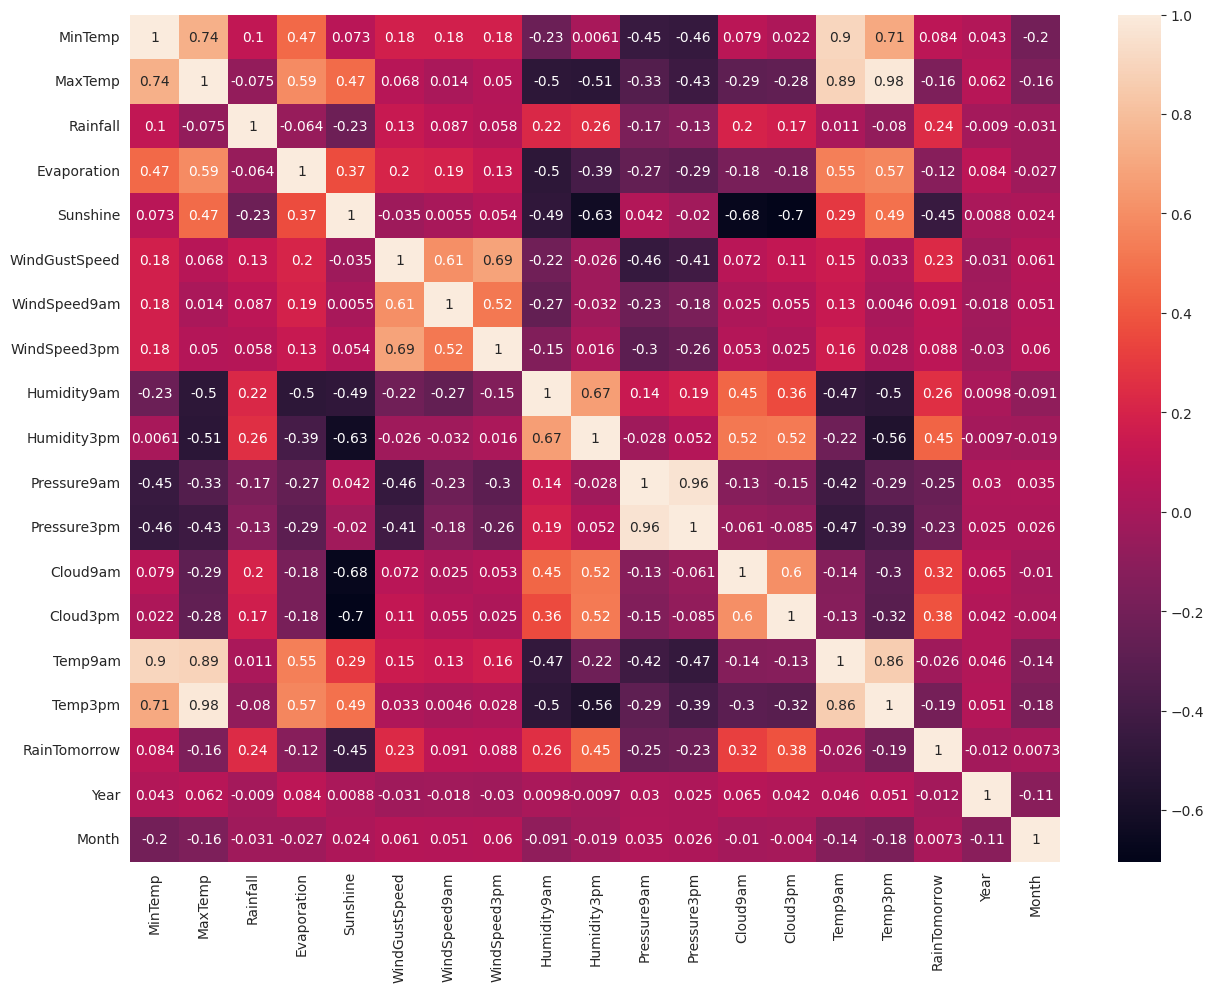

In [8]:
plt.figure(figsize=(15,11))
sns.heatmap(rains.corr(numeric_only=True), annot=True)

Text(0.5, 1.0, 'Disparidad de dias de lluvia en Australia 2007-2016')

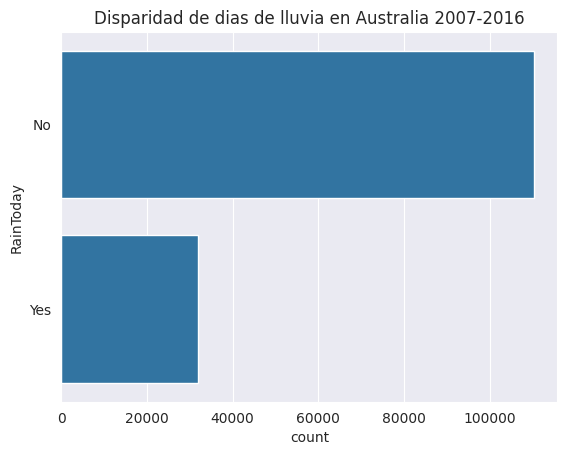

In [78]:
sns.countplot(rains['RainToday'])
plt.title('Disparidad de dias de lluvia en Australia 2007-2016')

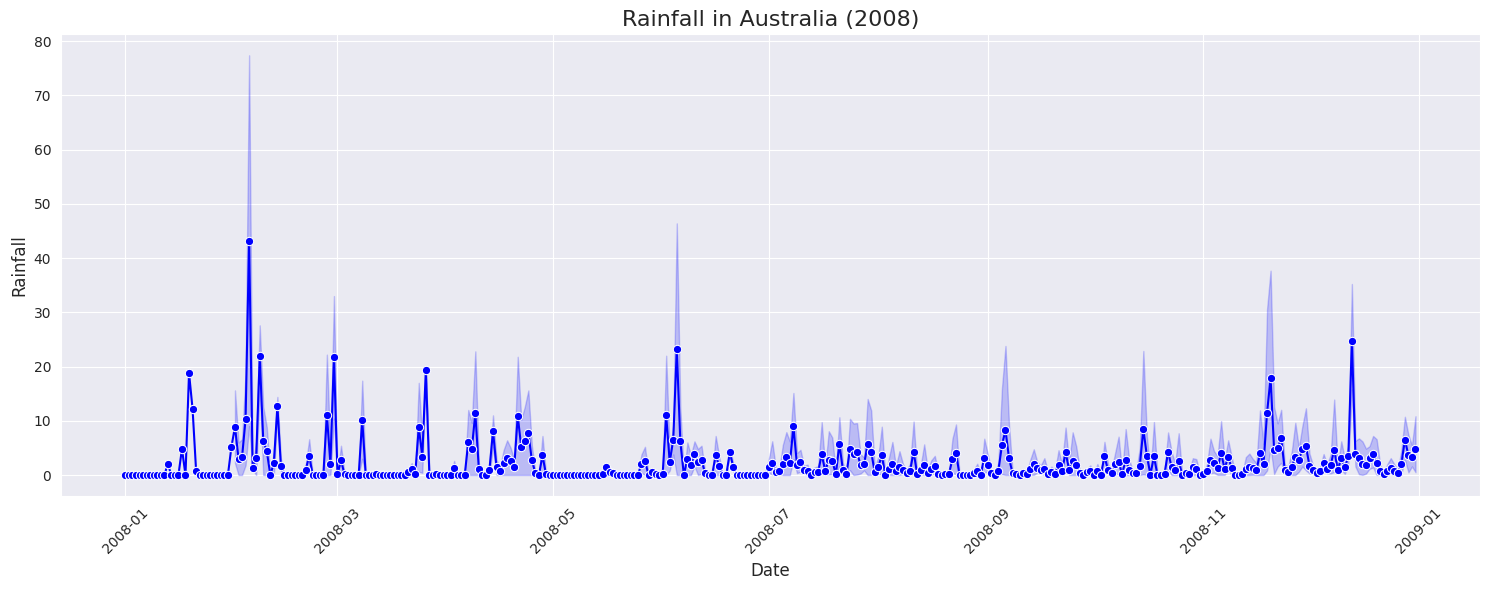

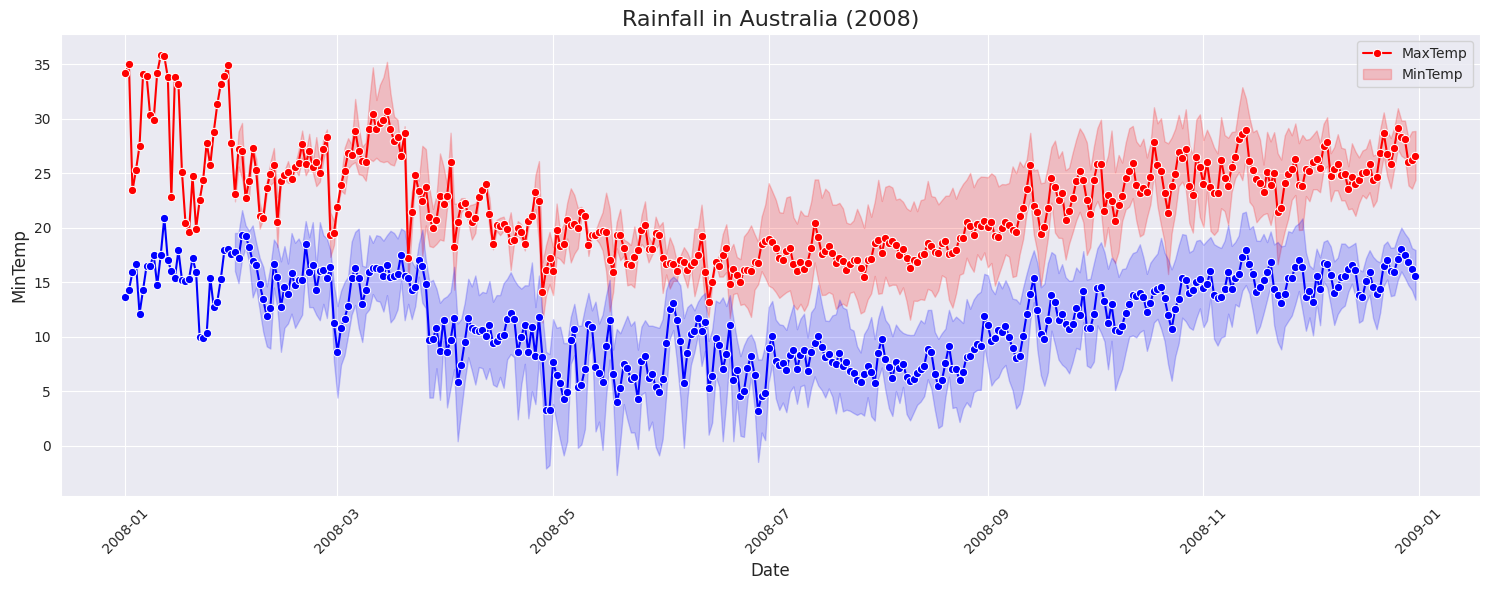

In [18]:
def plot_series(df, column, year, color='b'):
    first_year = rains[rains['Date'].dt.year == year]
    
    # Create a line plot of 'Rainfall' over time
    sns.lineplot(x='Date', y=column, data=first_year, marker='o', color=color)
    
    # Customize the plot
    plt.title(f'Rainfall in Australia ({year})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)  # Add grid
        
    # Show the plot
plt.figure(figsize=(15, 6))
plot_series(rains, 'Rainfall', 2008)
plt.show()
plt.figure(figsize=(15, 6))
plot_series(rains, 'MaxTemp', 2008, color='r')
plot_series(rains, 'MinTemp', 2008, color='b')
plt.legend(['MaxTemp', 'MinTemp'])
plt.show()


In [10]:
rains['RainTomorrow'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: RainTomorrow
Non-Null Count   Dtype  
--------------   -----  
142193 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


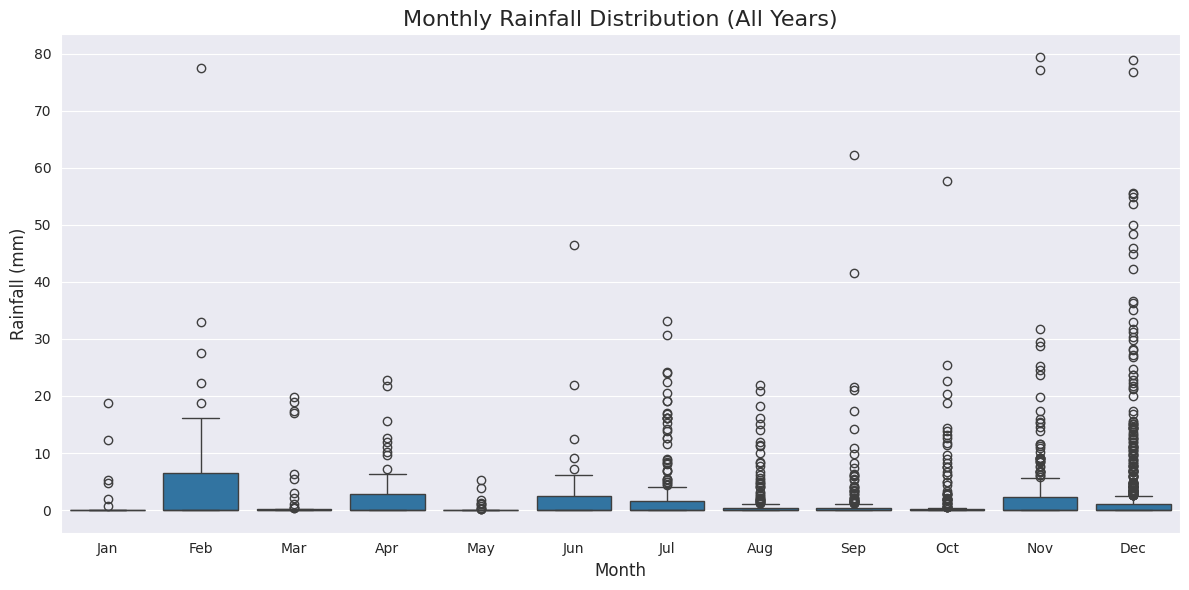

In [11]:
def monthly_rains_box(df, year=None):
    # Create a boxplot of 'Rainfall' by 'Month' for all years
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Rainfall', data=df if year is None else df[df['Date'].dt.year == year])
    
    # Customize the plot
    plt.title('Monthly Rainfall Distribution (All Years)', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Show the plot
    plt.tight_layout()
    plt.show()
monthly_rains_box(rains, 2008)

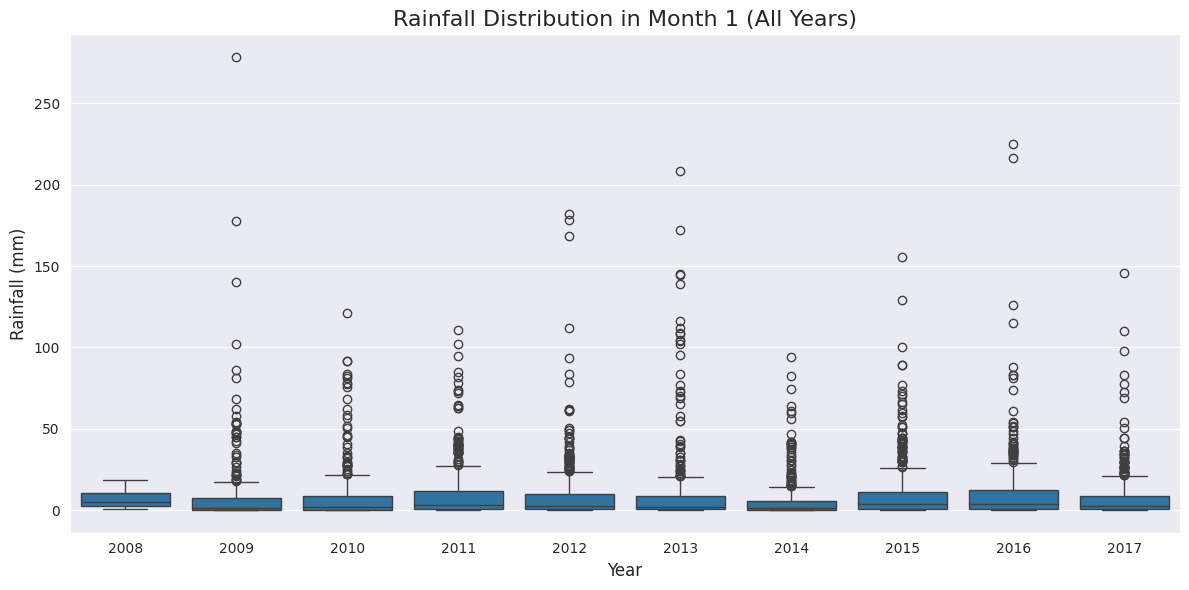

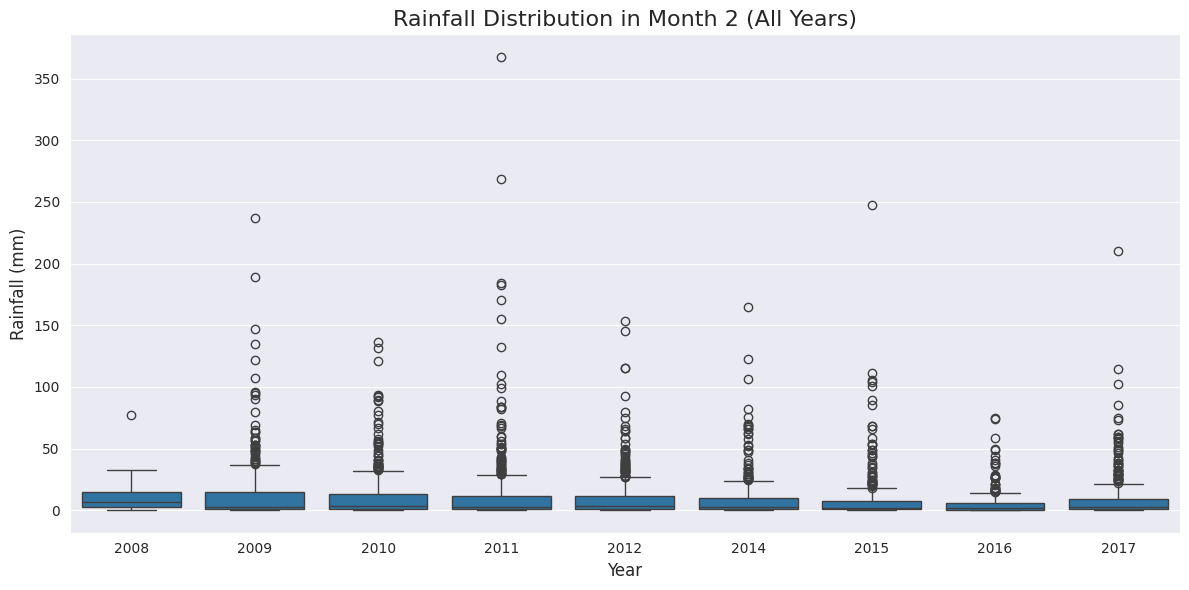

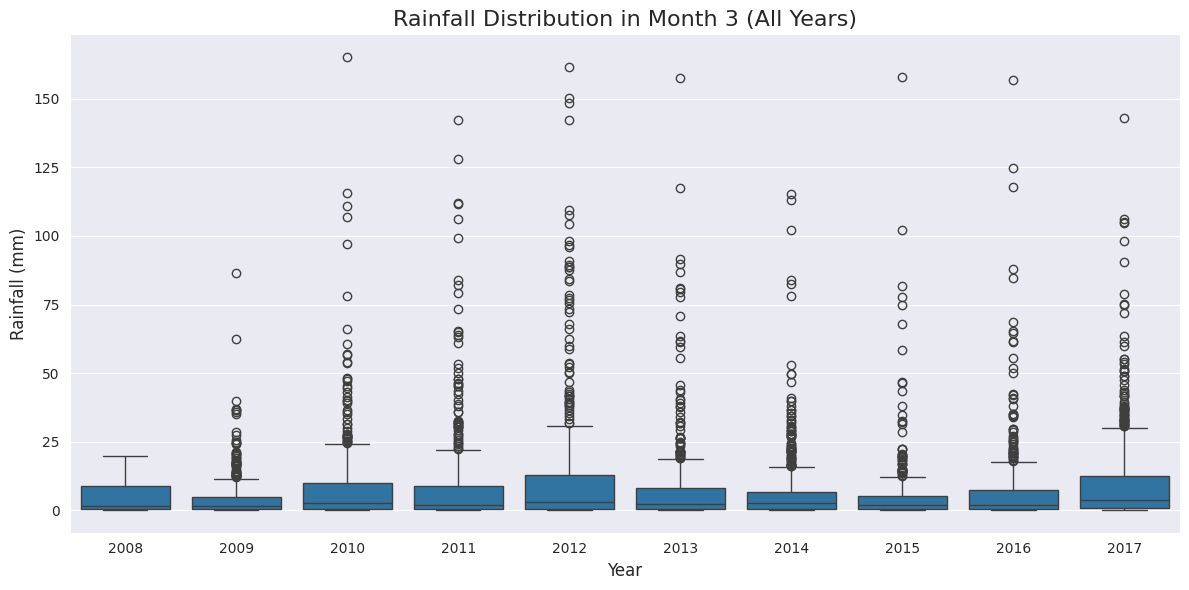

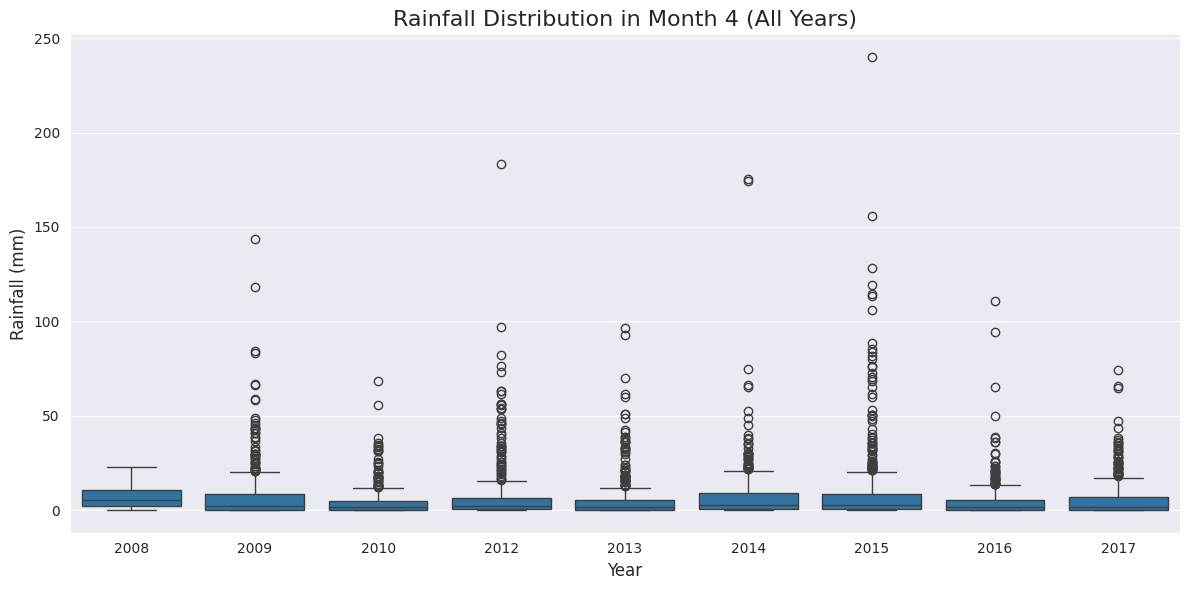

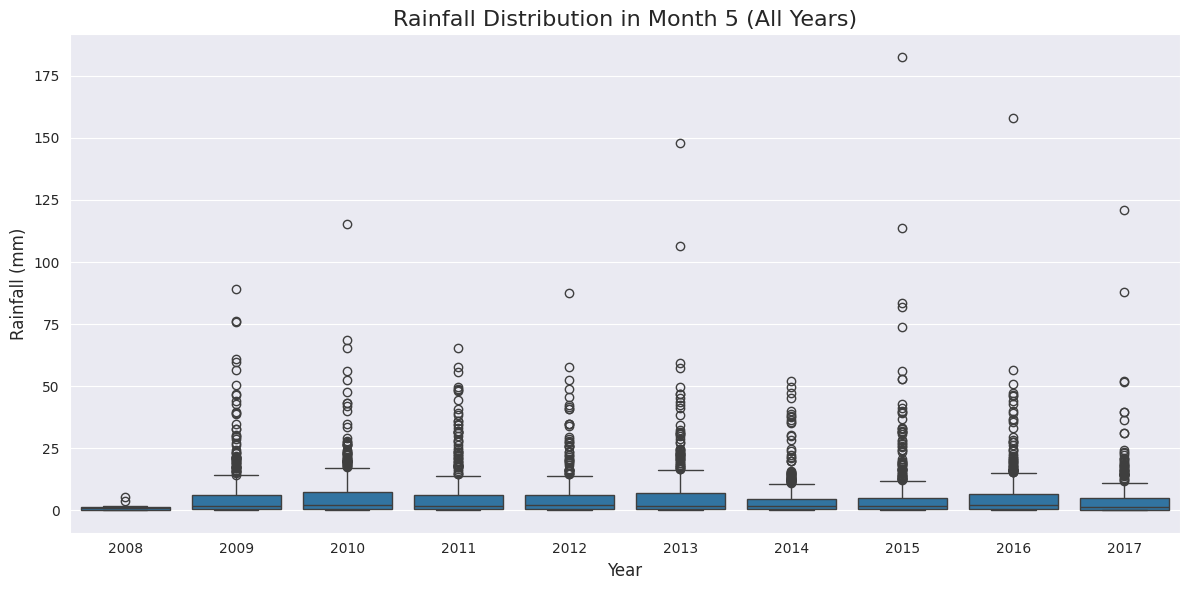

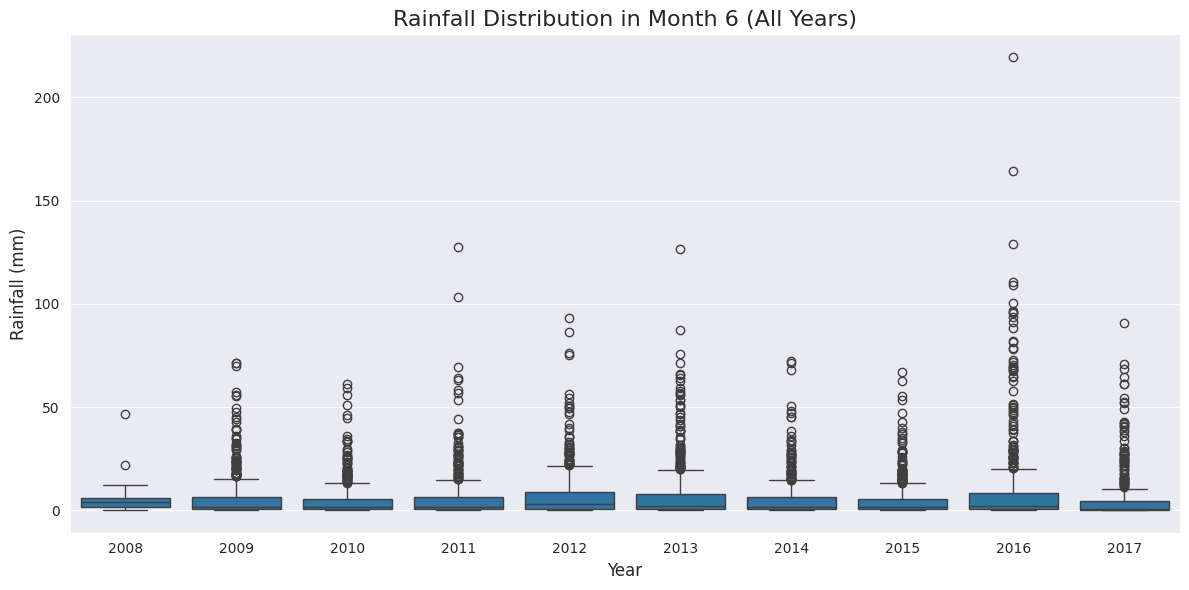

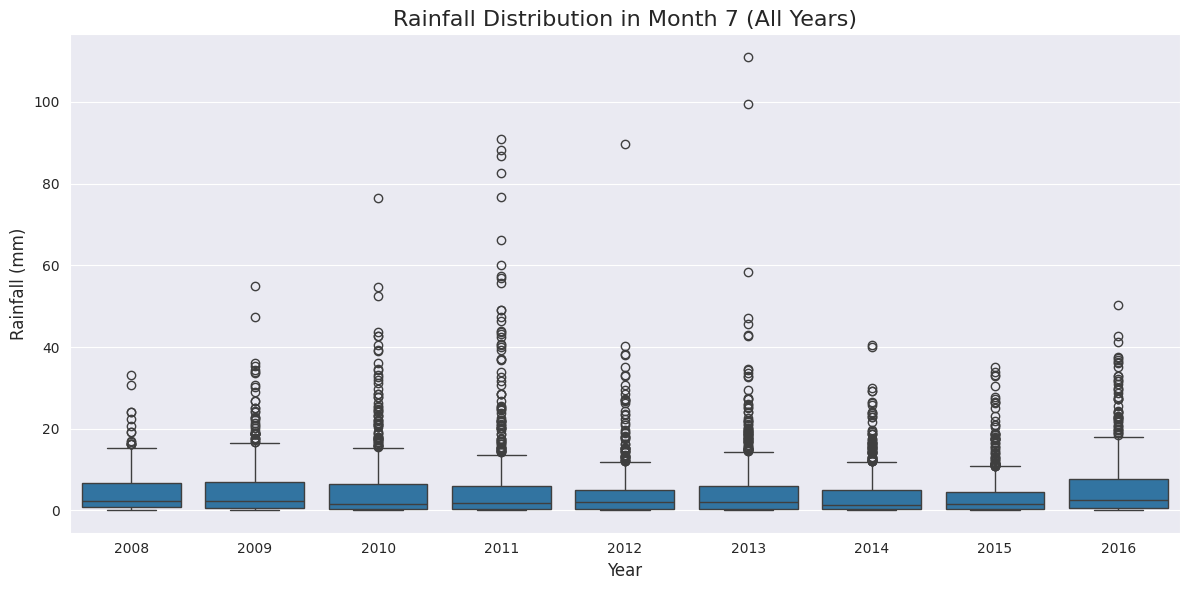

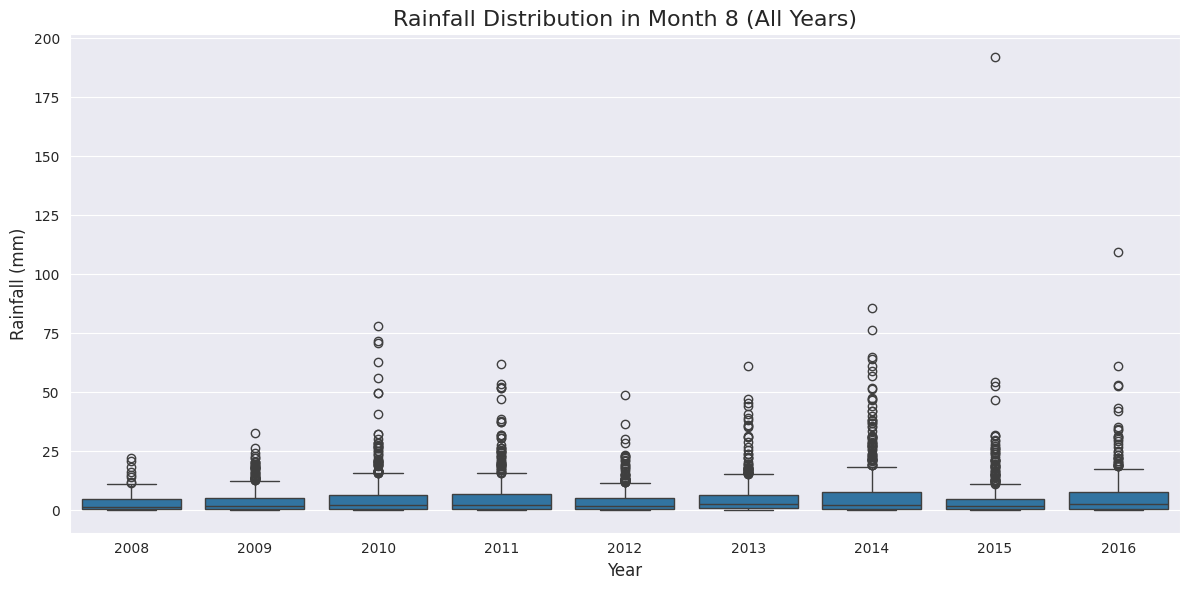

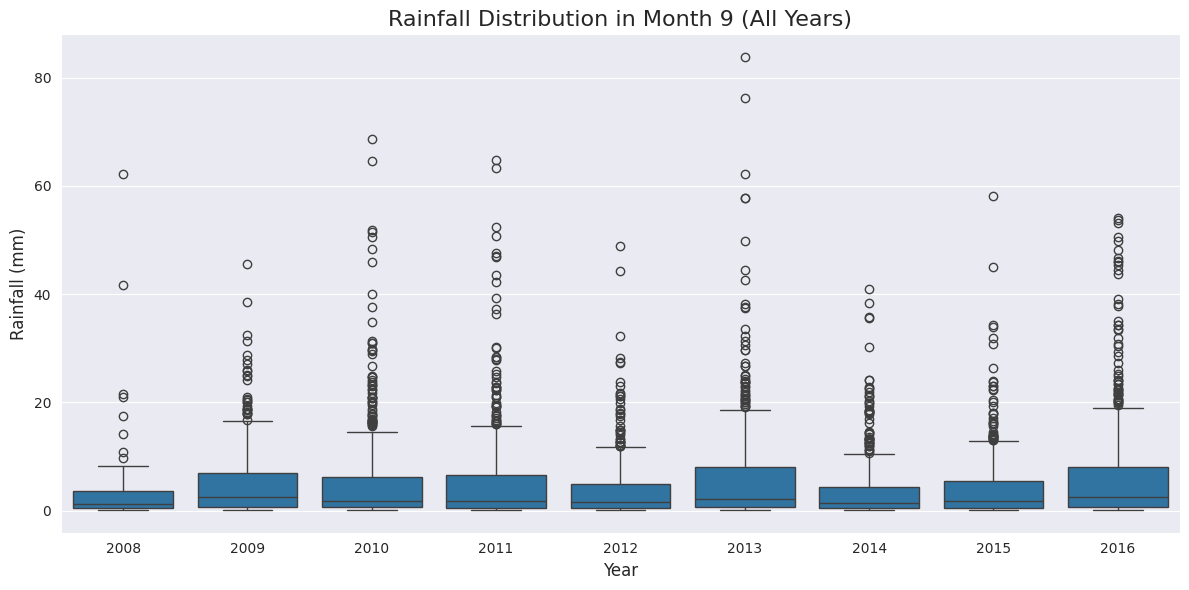

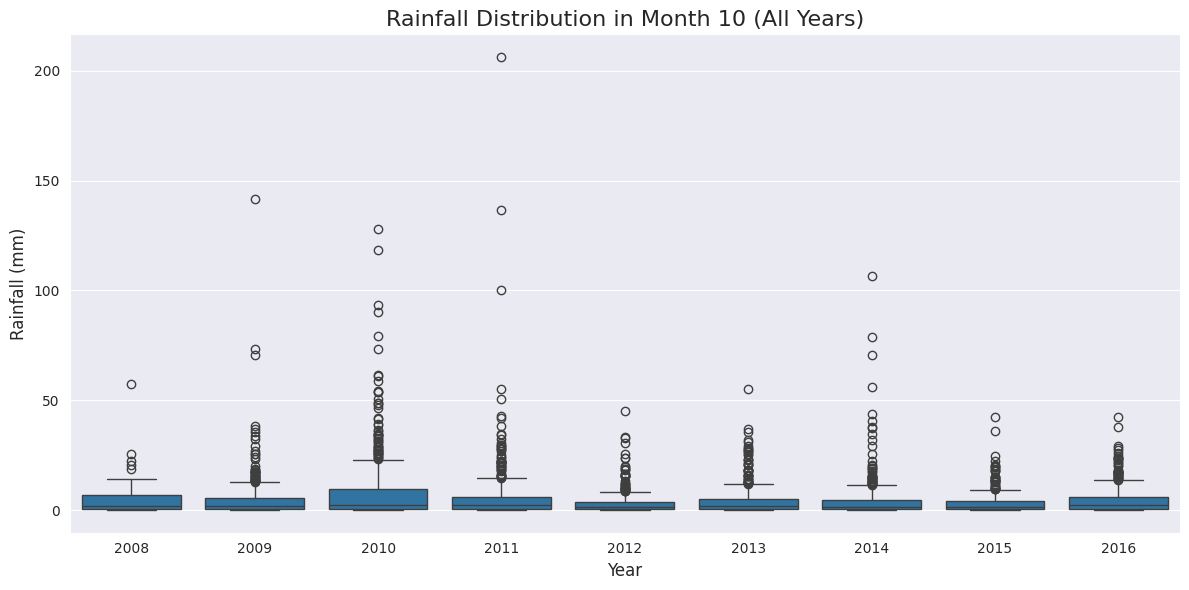

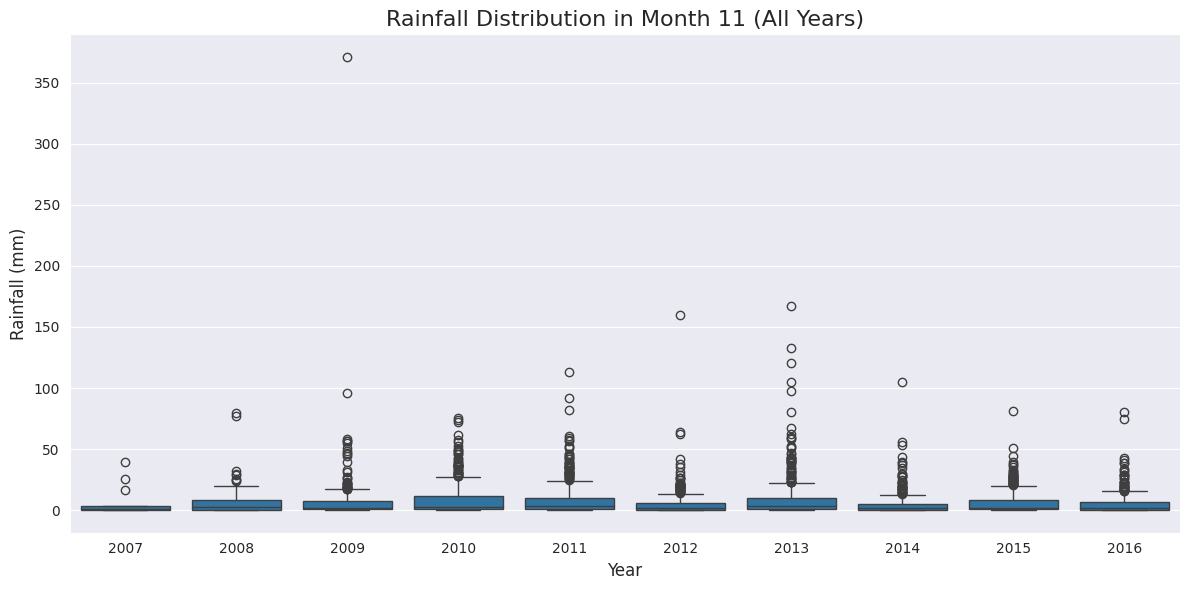

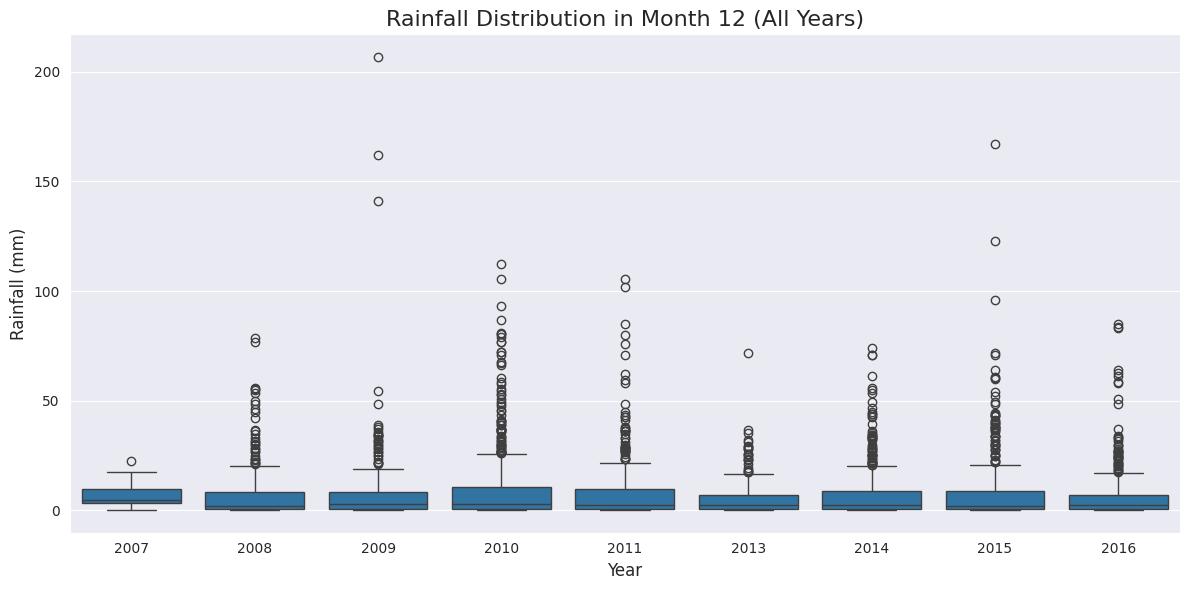

In [21]:
def historic_by_month_box(df, month):
    # Filter data to include only December of all years
    df_month = df[(df['Date'].dt.month == month) & (df['Rainfall'] > 0) ]
    
    # Create a boxplot of 'Rainfall' for all Decembers
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Rainfall', data=df_month)
    
    # Customize the plot
    plt.title(f'Rainfall Distribution in Month {month} (All Years)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
for i in range(1, 13):
    historic_by_month_box(rains, i)

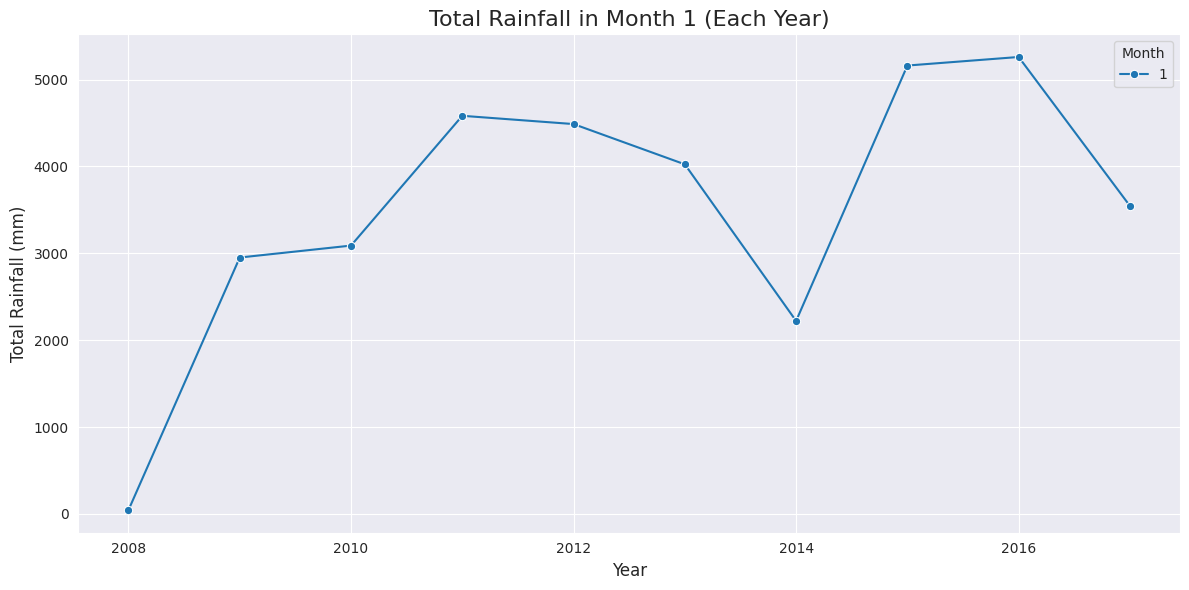

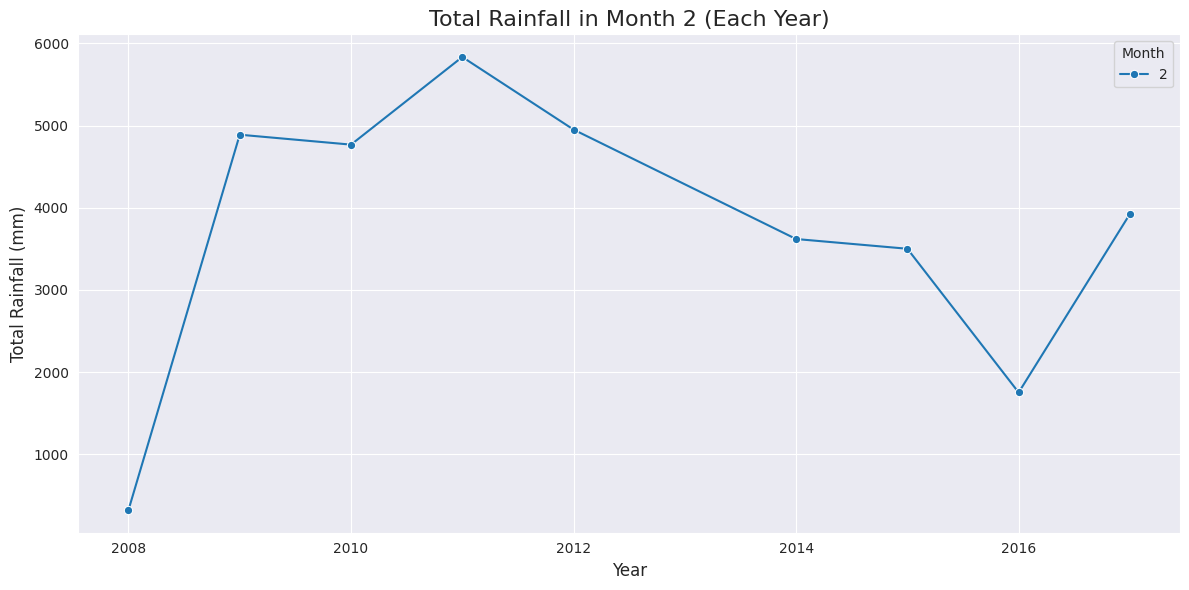

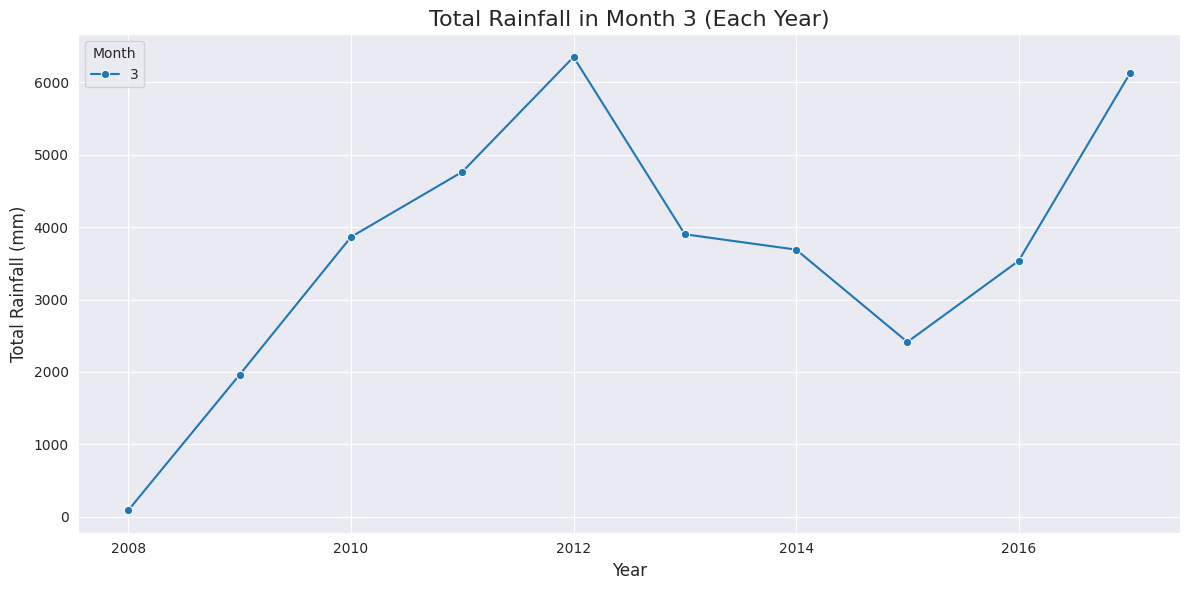

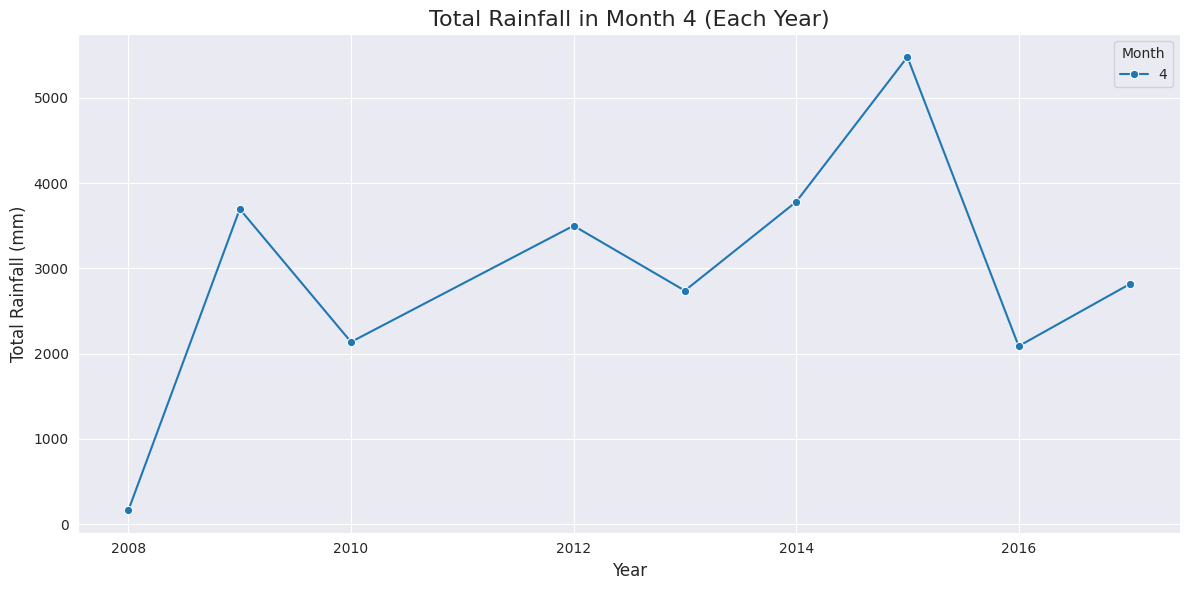

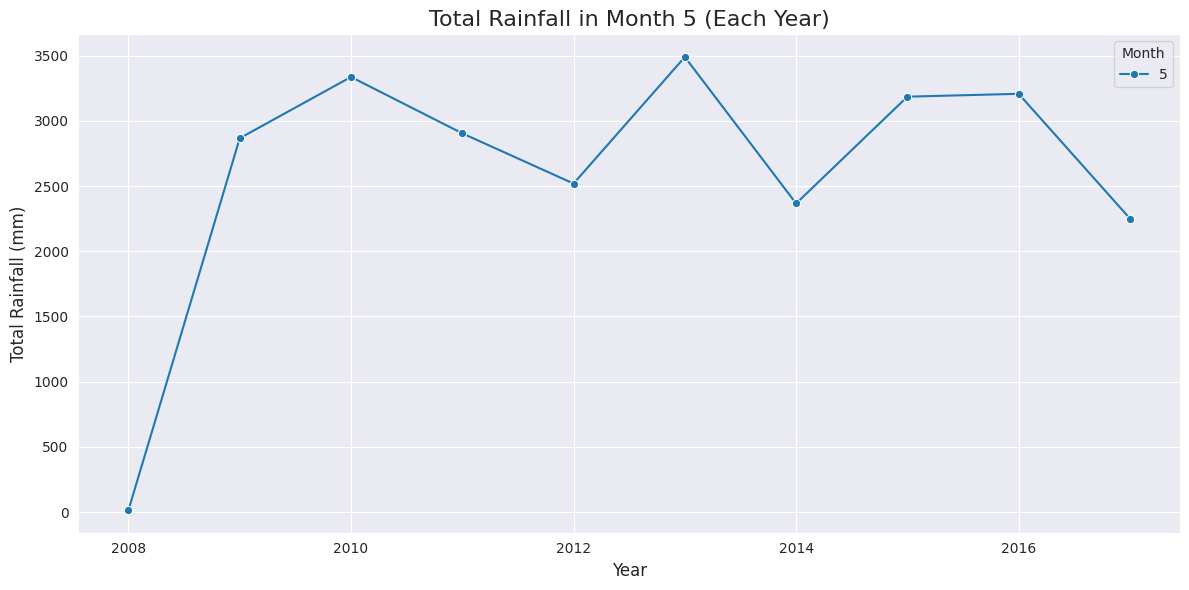

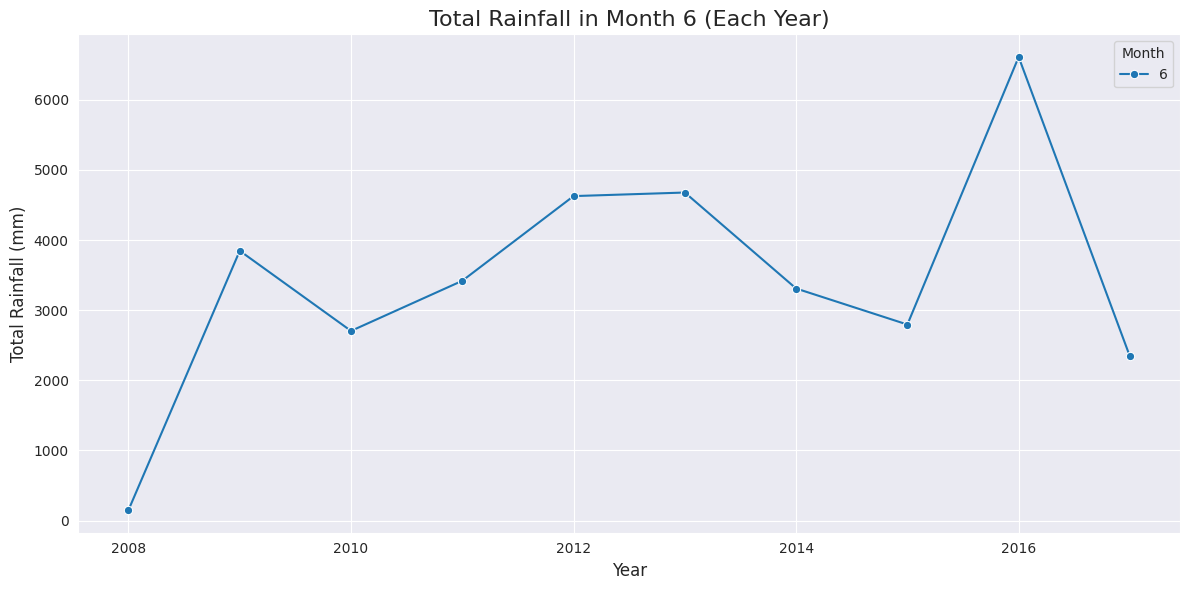

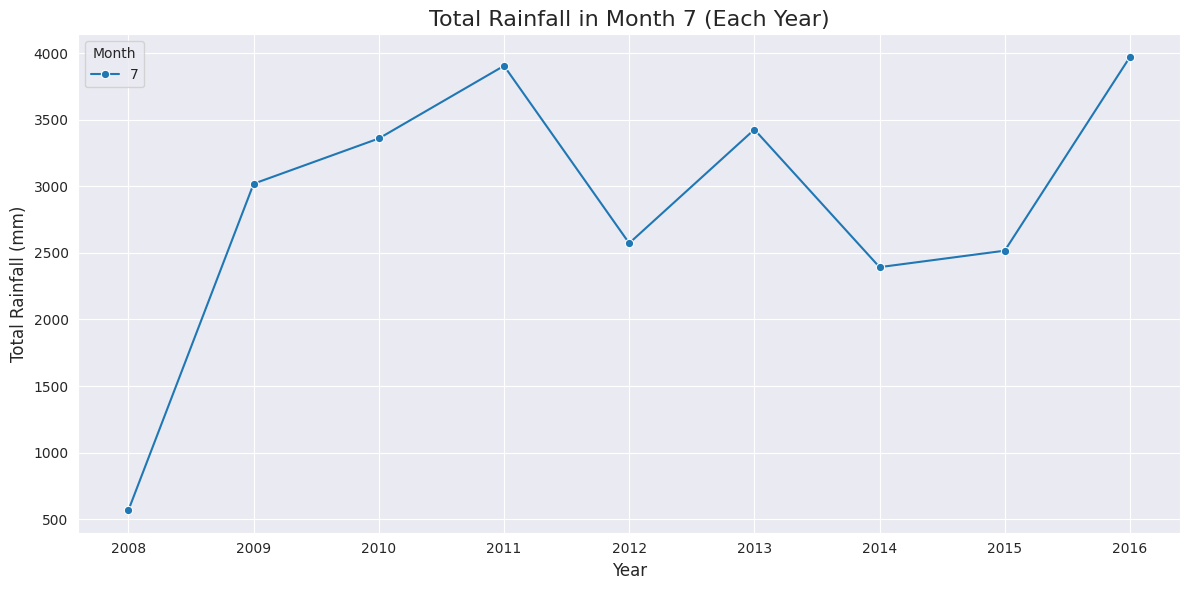

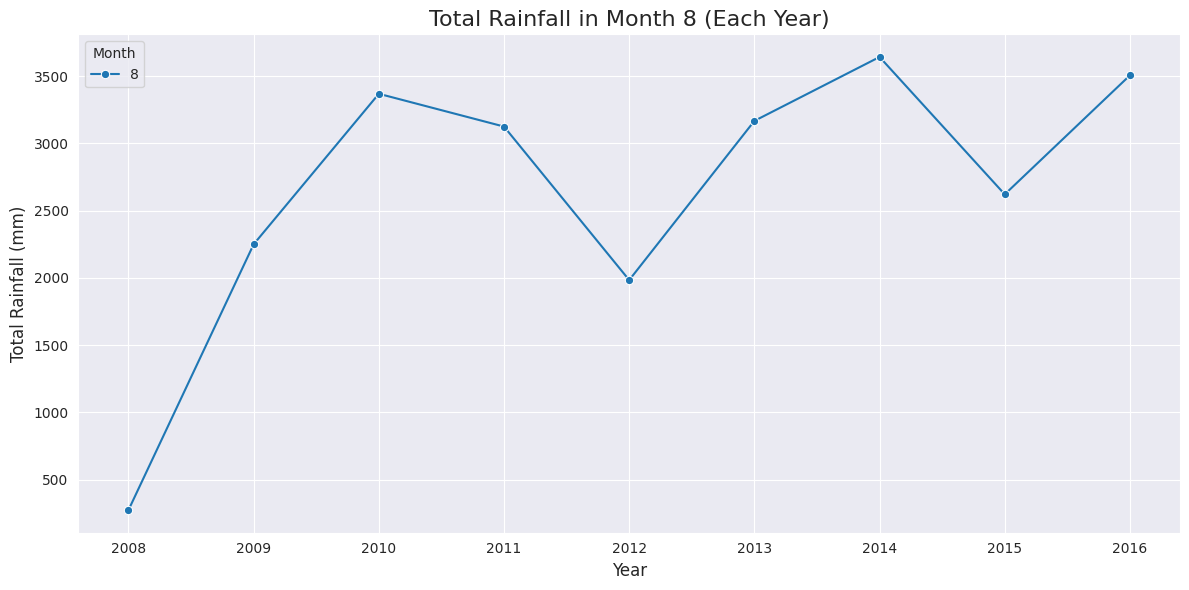

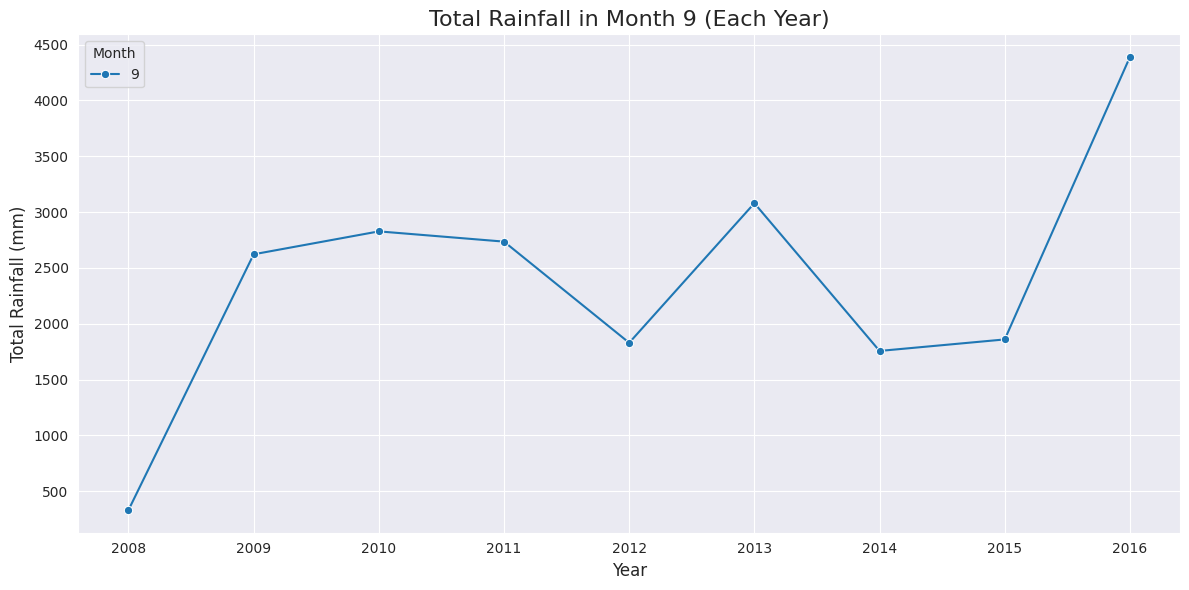

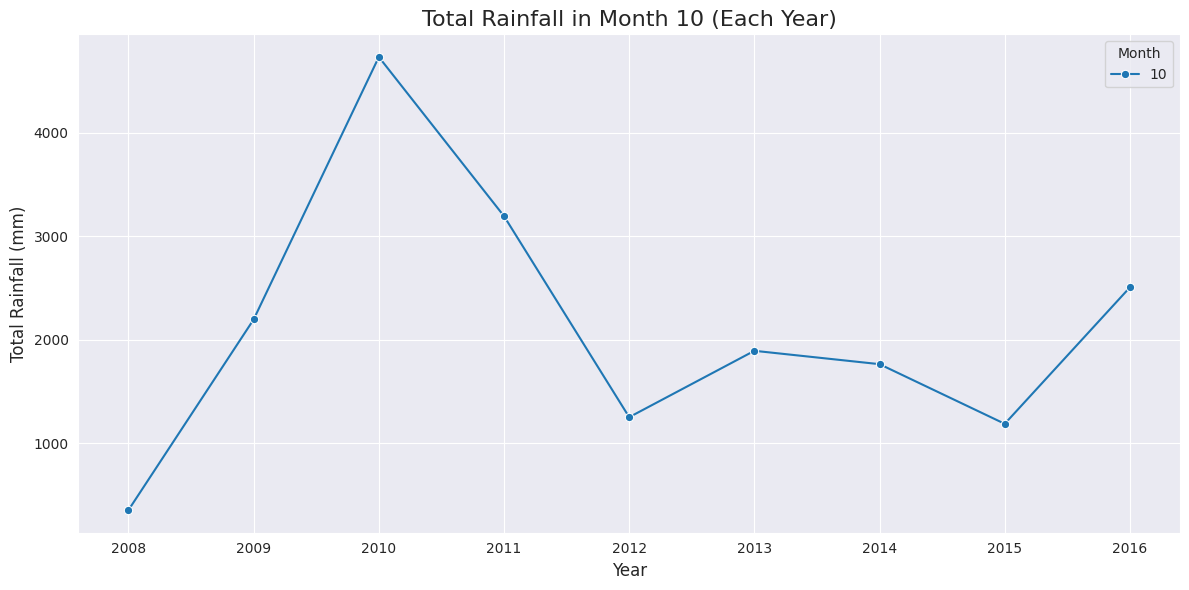

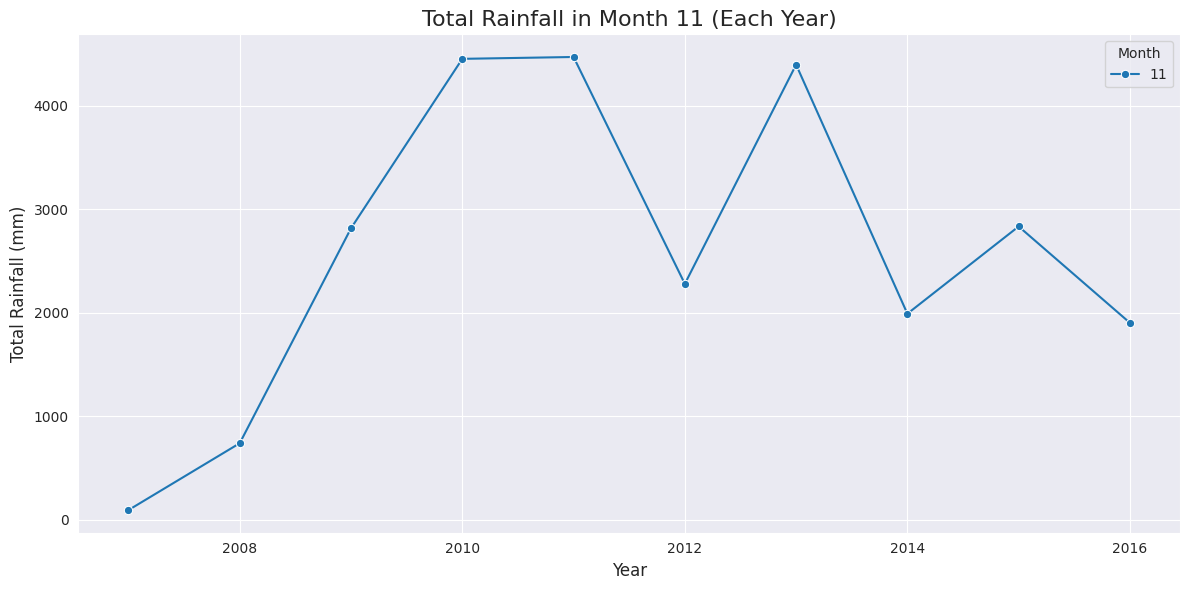

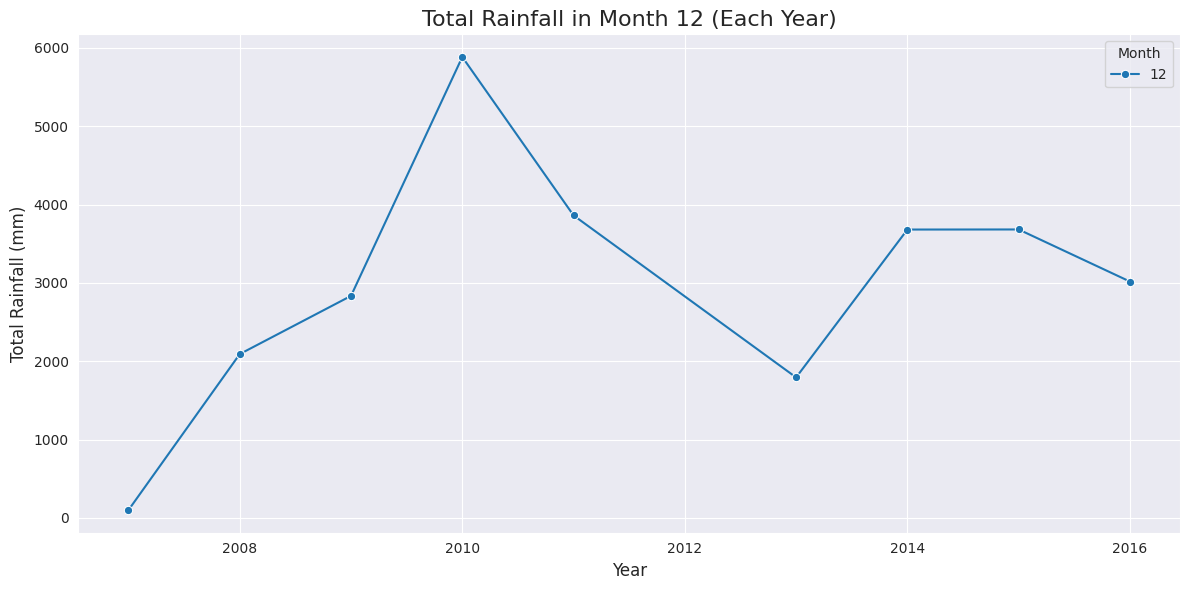

In [13]:
def total_rains_by_month_line(df, month):
    df_month = df[df['Date'].dt.month == month]

# Group by year and calculate the total rainfall for each December
    total_rain_month = df_month.groupby(df_month['Date'].dt.year)['Rainfall'].sum().reset_index()
    
    # Create a line plot of the total rainfall for each December
    sns.lineplot(x='Date', y='Rainfall', data=total_rain_month, marker='o', label=f'{month}')
    
    # Customize the plot
    plt.title(f'Total Rainfall in Month {month} (Each Year)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.legend(title='Month')
    # Show the plot
    plt.tight_layout()


for i in range(1,13):
    plt.figure(figsize=(12, 6))
    total_rains_by_month_line(rains, i)
    plt.show()

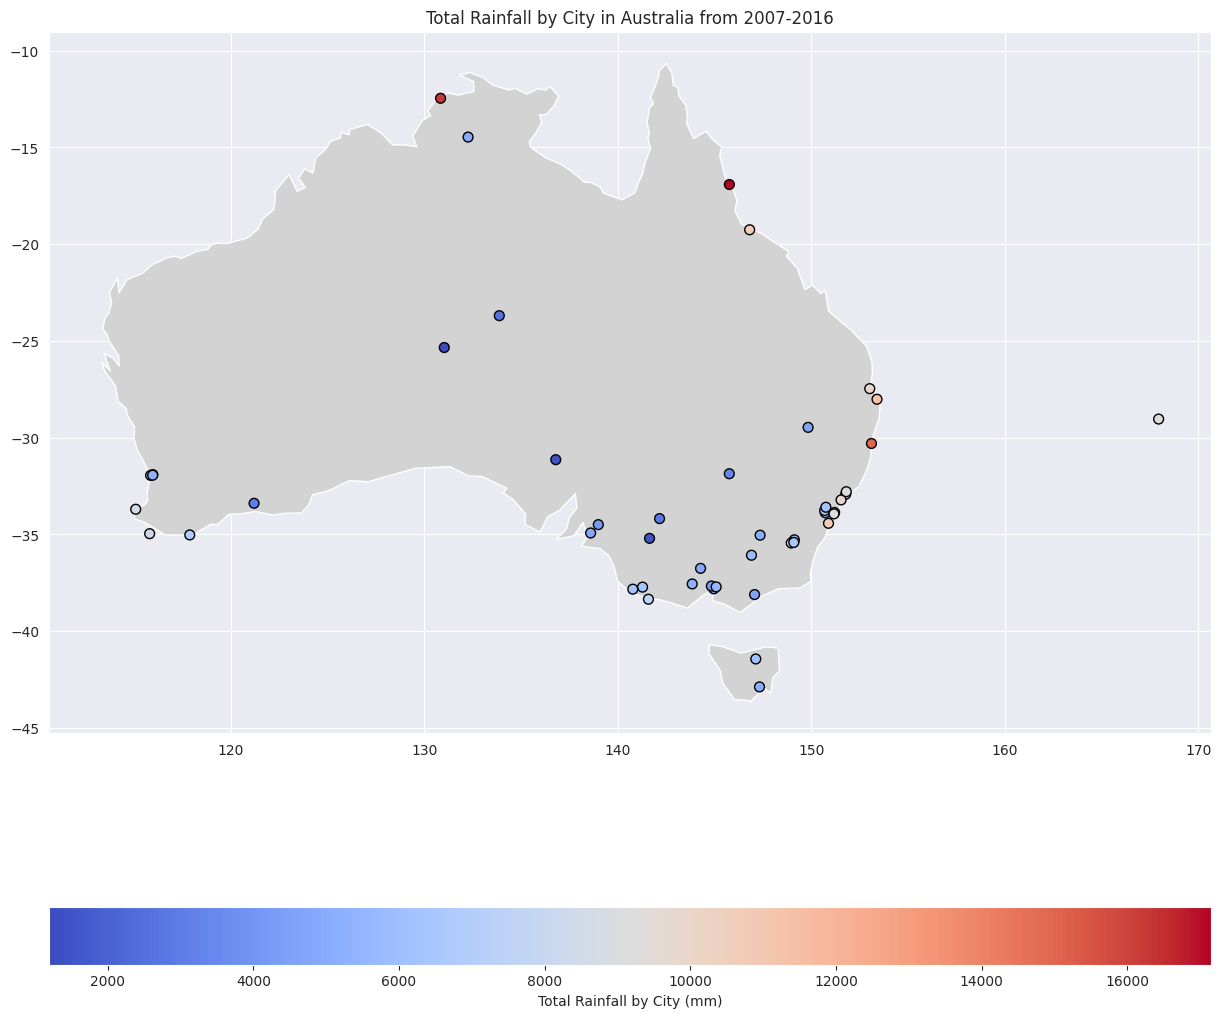

In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load the dataset
data = rains

# Drop rows with missing 'Rainfall' and 'Location' values
data_clean = data.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and get total rainfall for each city
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Get unique city locations (we assume that each city is a point)
# For simplicity, let's use a hypothetical dataset for city coordinates
# For real-world use, you'd replace this with actual coordinates or a geospatial file

# Hypothetical city coordinates (latitude, longitude)
# Coordinates for the cities (replace with actual coordinates or use a geocoding API)
city_coords = {
    'Albury': (-36.0785, 146.9136),
    'BadgerysCreek': (-33.8813, 150.7282),
    'Cobar': (-31.8667, 145.7667),
    'CoffsHarbour': (-30.3026, 153.1137),
    'Moree': (-29.4706, 149.8392),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2202, 151.5433),
    'NorfolkIsland': (-29.0408, 167.9541),
    'Penrith': (-33.7675, 150.6931),
    'Richmond': (-33.5982, 150.7581),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.0433, 147.3587),
    'Williamtown': (-32.7951, 151.8118),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4167, 149.1000),
    'MountGinini': (-35.4471, 148.9685),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7582, 144.2814),
    'Sale': (-38.1100, 147.0737),
    'MelbourneAirport': (-37.6692, 144.8411),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1625),
    'Nhil': (-35.2060, 141.6450),
    'Portland': (-38.3516, 141.5878),
    'Watsonia': (-37.7139, 145.0875),
    'Dartmoor': (-37.7251, 141.2843),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7710),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2589, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8321, 140.7807),
    'Nuriootpa': (-34.4973, 138.9966),
    'Woomera': (-31.1395, 136.7984),
    'Albany': (-35.0285, 117.8837),
    'Witchcliffe': (-33.7015, 115.0911),
    'PearceRAAF': (-31.9131, 115.9741),
    'PerthAirport': (-31.9402, 115.9676),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-33.3937, 121.2060),
    'Walpole': (-34.9639, 115.8106),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4391, 147.1349),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4686, 132.2678),
    'Uluru': (-25.3444, 131.0369)
}

# Create GeoDataFrame with city coordinates and rainfall data
rainfall_by_city['Coordinates'] = rainfall_by_city['Location'].map(city_coords)
rainfall_by_city['geometry'] = rainfall_by_city['Coordinates'].apply(lambda x: Point(x[1], x[0]))
gdf = gpd.GeoDataFrame(rainfall_by_city, geometry='geometry')

# Load a map of Australia
world = gpd.read_file('../data/110m_cultural/ne_110m_admin_0_countries.shp')
australia = world[world['NAME'] == "Australia"]

# Plot the rainfall by city on a map
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')

# Plot cities as points on the map, color-coded by total rainfall
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
     edgecolor='black',  # Set marker edges to black for contrast
    linewidth=1  # Increase edge width for "bold" appearance)
)
# Set title and show plot
plt.title('Total Rainfall by City in Australia from 2007-2016')
plt.show()


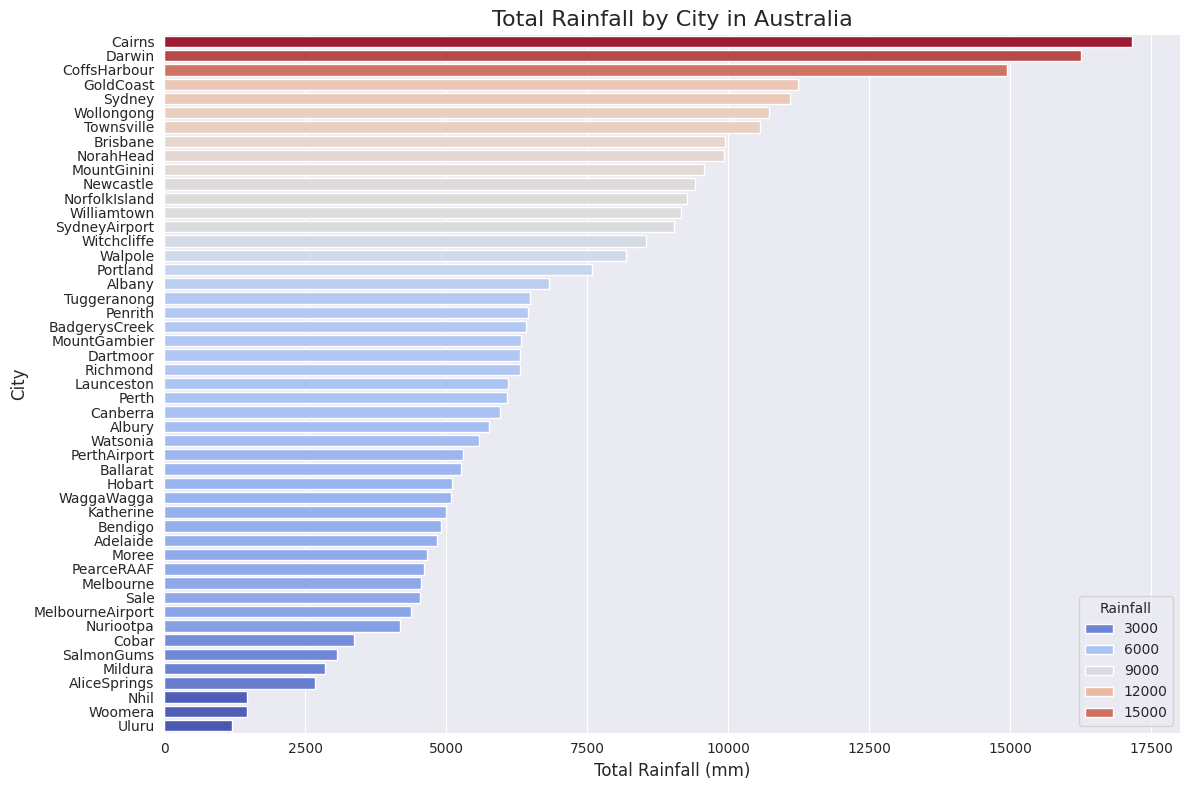

In [38]:
data_clean = rains.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and sum rainfall
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Sort by total rainfall for better visualization
rainfall_by_city = rainfall_by_city.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall', 
    y='Location', 
    data=rainfall_by_city, 
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Total Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_1275460/2439412042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['year'] = data_clean['Date'].dt.year


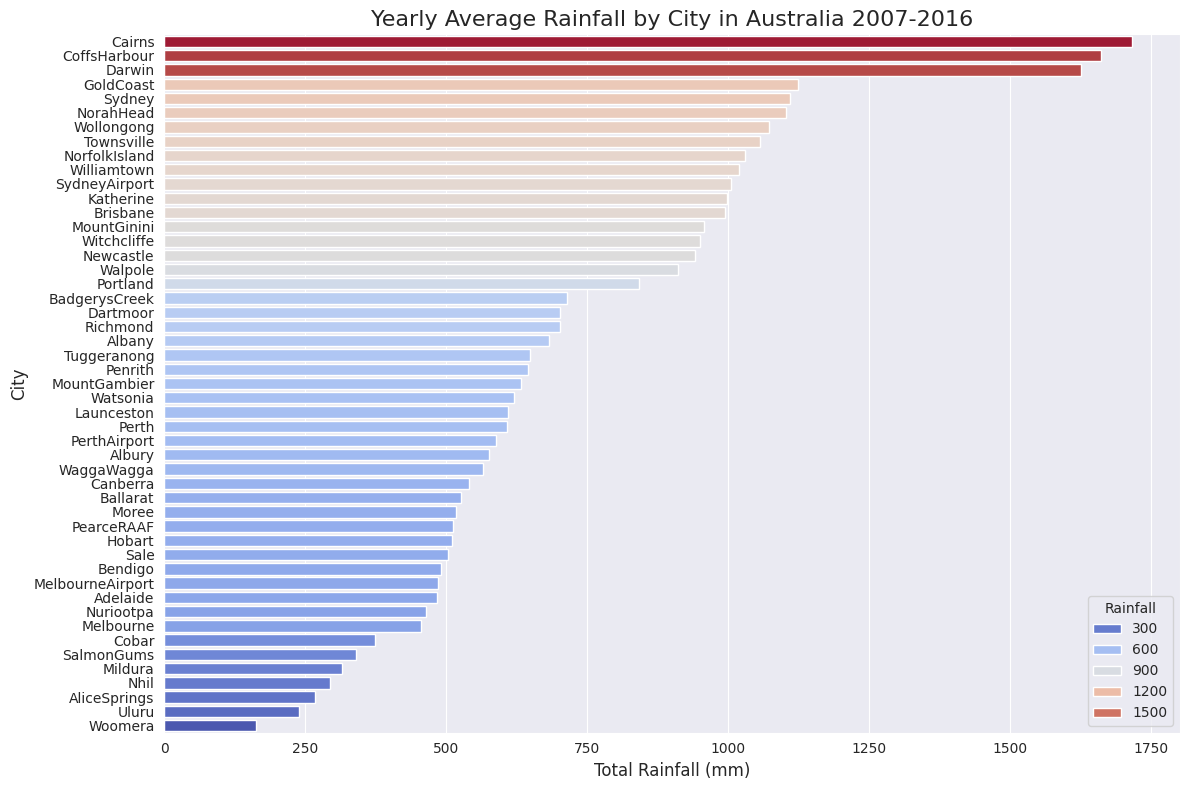

In [74]:
data_clean['year'] = data_clean['Date'].dt.year
group_by_loc_year = data_clean.groupby(['Location', 'year'])['Rainfall'].sum().groupby('Location').mean().reset_index()

rainfall_by_city = group_by_loc_year.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall', 
    y='Location', 
    data=rainfall_by_city, 
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Yearly Average Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()